In [1]:
#Paso 1. Obterner la data
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats #conda install scikit-learn
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

train = pd.read_csv('bbva_train.csv')
test =  pd.read_csv('bbva_test_incomplete.csv')


print("Done...")

Done...


In [3]:
#Viendo data Train por columnas
train.head()


,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,53643,201208,1,Rang_ingreso_06,Lima,32.0,8.0,1,Cero,15940,...,3,3,3,3,1,1,1,1,1,1
1,67960,201208,1,Rang_ingreso_03,Lima,25.0,5.0,0,Rango_SDO_02,0,...,5,5,5,4,1,1,1,1,1,1
2,93652,201208,1,Rang_ingreso_02,Lima,35.0,0.0,0,Rango_SDO_01,0,...,1,1,1,1,1,1,1,1,1,1
3,52446,201208,1,Rang_ingreso_03,Lima,32.0,6.0,0,Cero,1670,...,3,3,3,3,1,1,1,1,1,1
4,96645,201208,1,Rang_ingreso_07,Lima,30.0,9.0,0,Rango_SDO_01,2620,...,4,3,3,3,1,1,1,1,1,1


In [3]:
#Viendo la Info de c/columna de Train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 53 columns):
ID_CORRELATIVO               56000 non-null int64
CODMES                       56000 non-null int64
FLG_BANCARIZADO              56000 non-null int64
RANG_INGRESO                 48448 non-null object
FLAG_LIMA_PROVINCIA          53299 non-null object
EDAD                         51719 non-null float64
ANTIGUEDAD                   54579 non-null float64
ATTRITION                    56000 non-null int64
RANG_SDO_PASIVO_MENOS0       56000 non-null object
SDO_ACTIVO_MENOS0            56000 non-null int64
SDO_ACTIVO_MENOS1            56000 non-null int64
SDO_ACTIVO_MENOS2            56000 non-null int64
SDO_ACTIVO_MENOS3            56000 non-null int64
SDO_ACTIVO_MENOS4            56000 non-null int64
SDO_ACTIVO_MENOS5            56000 non-null int64
FLG_SEGURO_MENOS0            56000 non-null int64
FLG_SEGURO_MENOS1            56000 non-null int64
FLG_SEGURO_MENOS2            56000

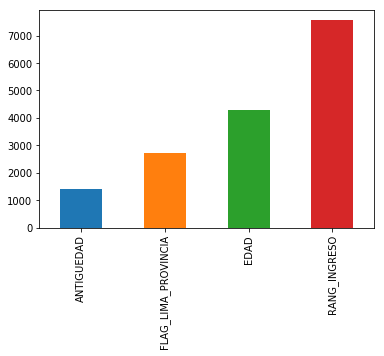

In [7]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

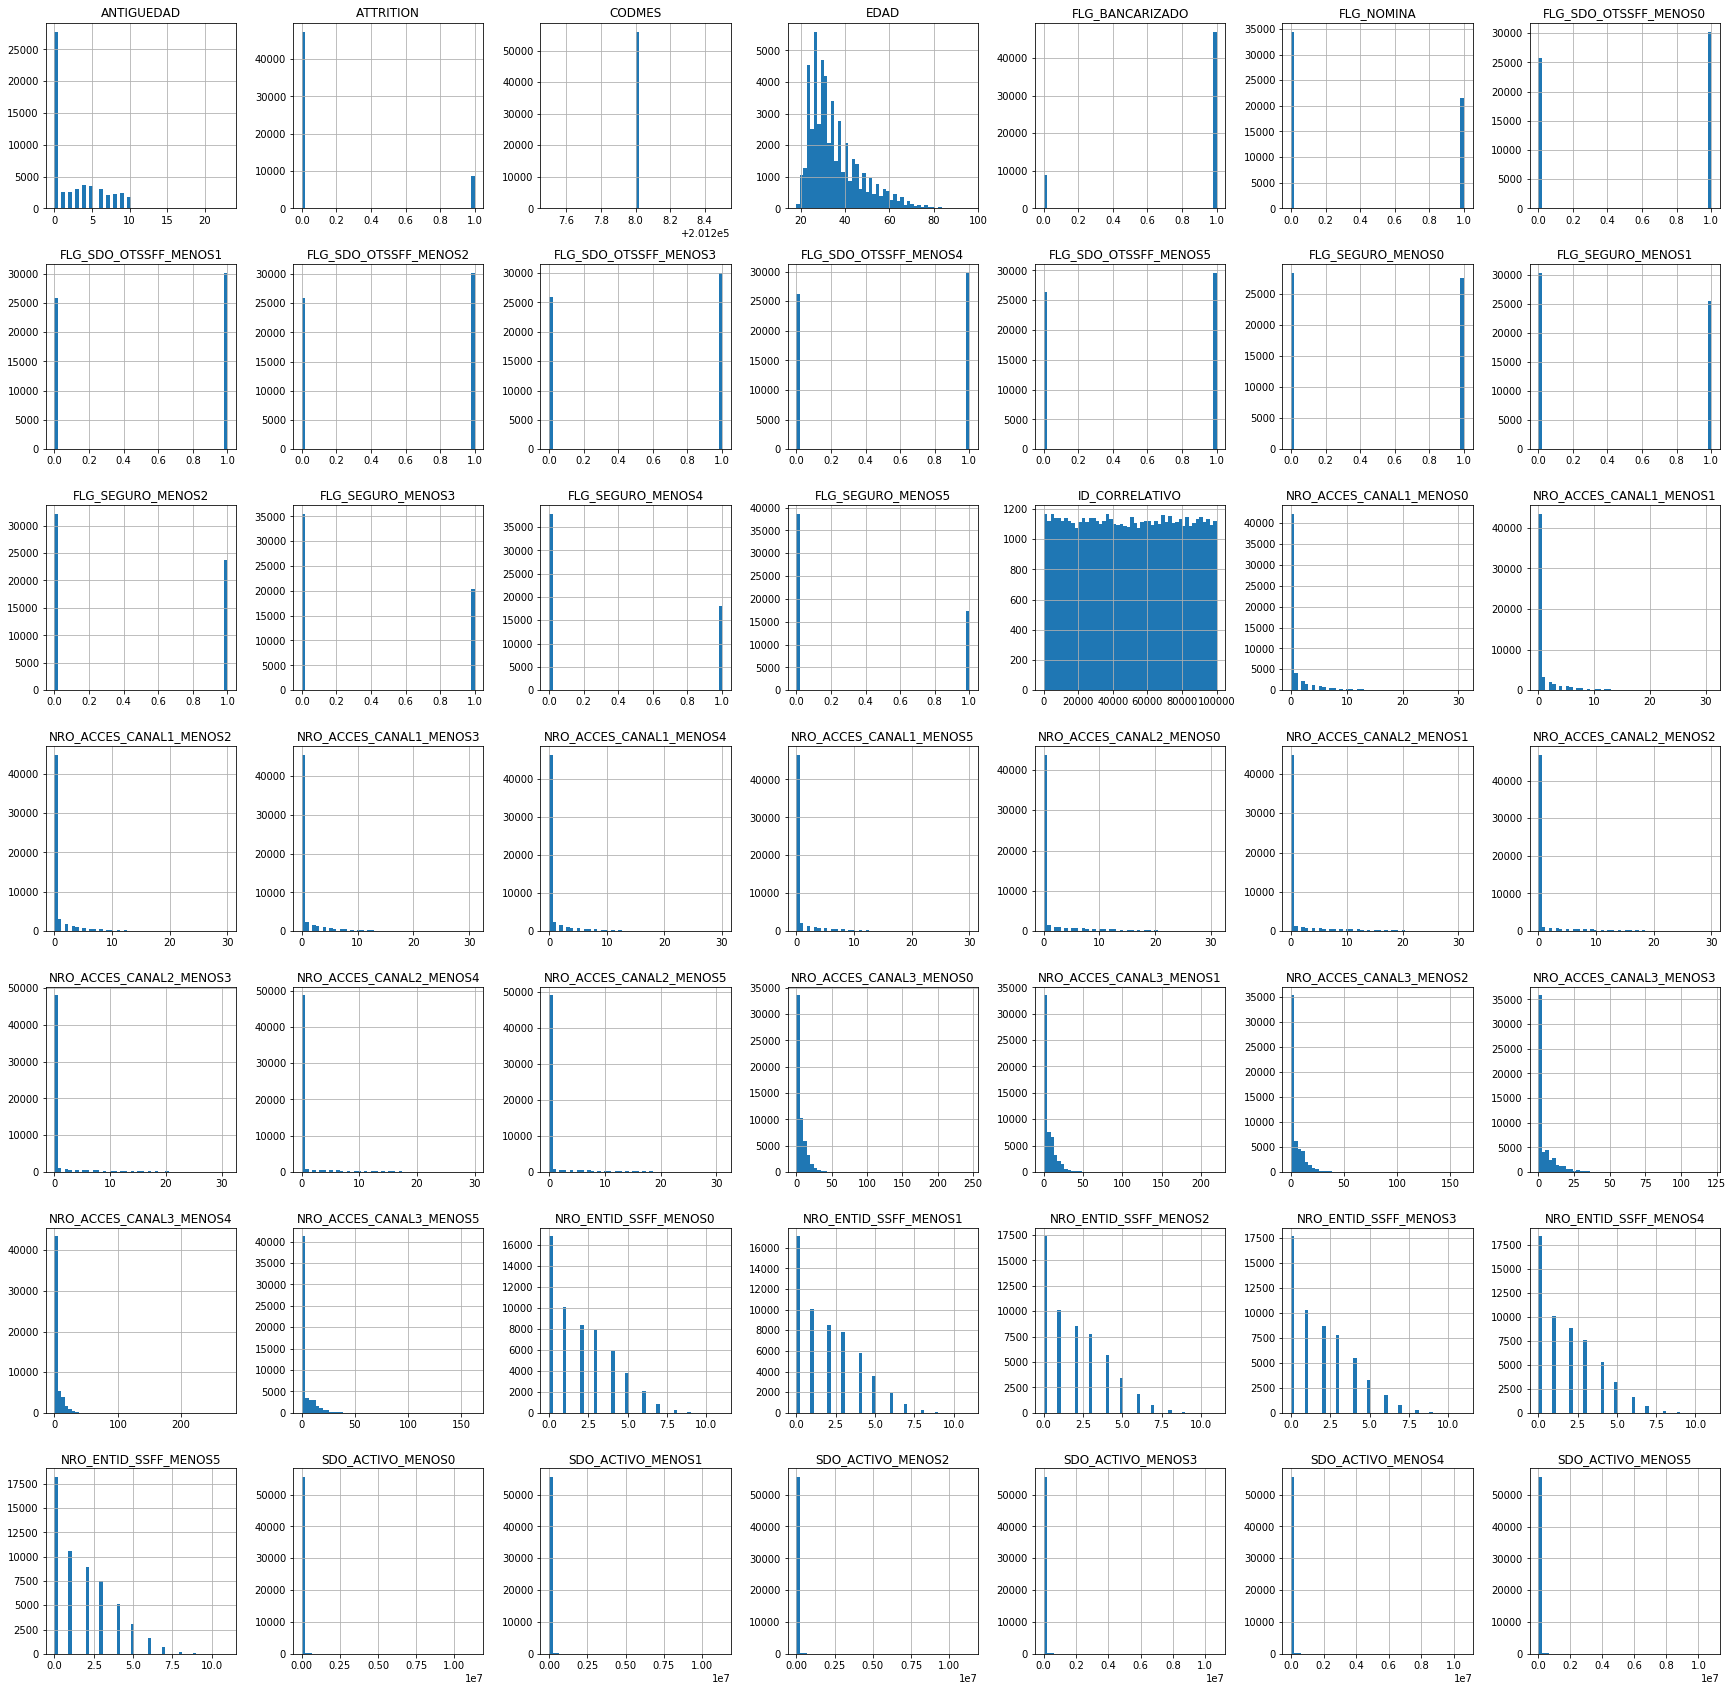

In [5]:
#Histogramas
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(30,30))
plt.show()

In [8]:
#Qué queremos predecir
print(train['ATTRITION'].head())
train['ATTRITION'].describe()

0    1
1    0
2    0
3    0
4    0
Name: ATTRITION, dtype: int64


count    56000.000000
mean         0.154607
std          0.361533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ATTRITION, dtype: float64

La variable a predecir, es un valor entre 0 o 1

In [9]:
#Variables que se correlacionan (bajo esta característica de debería sacar el test_set)
corr_matrix = train.corr()
corr_matrix["ATTRITION"].sort_values(ascending=False)
#Son edad e Id_Correlativo

ATTRITION                  1.000000
EDAD                       0.004558
ID_CORRELATIVO             0.003097
SDO_ACTIVO_MENOS3         -0.029459
SDO_ACTIVO_MENOS2         -0.030188
SDO_ACTIVO_MENOS5         -0.030247
SDO_ACTIVO_MENOS1         -0.030803
SDO_ACTIVO_MENOS4         -0.030999
SDO_ACTIVO_MENOS0         -0.031104
NRO_ACCES_CANAL3_MENOS1   -0.031347
NRO_ACCES_CANAL3_MENOS0   -0.053116
FLG_BANCARIZADO           -0.054360
FLG_SDO_OTSSFF_MENOS5     -0.064415
FLG_NOMINA                -0.067474
FLG_SDO_OTSSFF_MENOS4     -0.071433
NRO_ACCES_CANAL3_MENOS2   -0.074465
NRO_ACCES_CANAL2_MENOS1   -0.075961
NRO_ACCES_CANAL2_MENOS0   -0.076798
FLG_SDO_OTSSFF_MENOS3     -0.078318
NRO_ACCES_CANAL2_MENOS5   -0.078530
NRO_ACCES_CANAL2_MENOS4   -0.078825
NRO_ACCES_CANAL2_MENOS2   -0.080535
NRO_ACCES_CANAL2_MENOS3   -0.081850
FLG_SDO_OTSSFF_MENOS2     -0.083846
FLG_SDO_OTSSFF_MENOS1     -0.085176
NRO_ENTID_SSFF_MENOS5     -0.085729
FLG_SDO_OTSSFF_MENOS0     -0.086107
NRO_ENTID_SSFF_MENOS4     -0

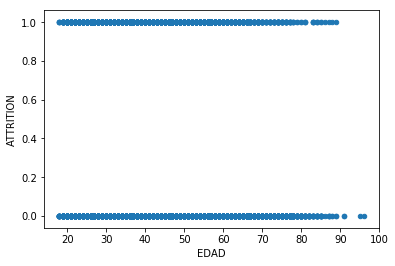

In [10]:
train.plot(kind="scatter", x="EDAD", y="ATTRITION")


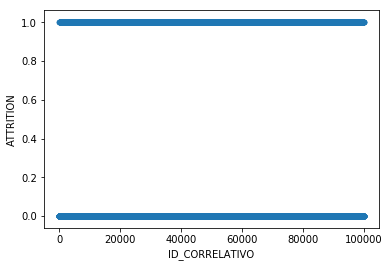

In [11]:
train.plot(kind="scatter", x="ID_CORRELATIVO", y="ATTRITION")


Es hora de completar nuestro data si hay datos faltantes y convertir var Categóricas a numéricas.

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

Primero, separamos la variable a predecir de nuestro train set y la almacenamos en otro vector

In [6]:
print(train.shape)
train_X = train.drop("ATTRITION", axis=1) # drop labels for training set
train_Y = train["ATTRITION"].copy()
print(train_X.shape)

(56000, 53)
(56000, 52)


In [7]:
#Usando LabelEncoder
from sklearn import preprocessing
for i in range(train_X.shape[1]):
    if train_X.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train_X.iloc[:,i].values) )
        train_X.iloc[:,i] = lbl.transform(list(train_X.iloc[:,i].values))
train_X 

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,53643,201208,1,5,0,32.0,8.0,0,15940,14530,...,3,3,3,3,1,1,1,1,1,1
1,67960,201208,1,2,0,25.0,5.0,2,0,0,...,5,5,5,4,1,1,1,1,1,1
2,93652,201208,1,1,0,35.0,0.0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3,52446,201208,1,2,0,32.0,6.0,0,1670,1460,...,3,3,3,3,1,1,1,1,1,1
4,96645,201208,1,6,0,30.0,9.0,1,2620,2560,...,4,3,3,3,1,1,1,1,1,1
5,58788,201208,0,1,0,25.0,4.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
6,93747,201208,0,0,0,NaN,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,67572,201208,1,1,0,30.0,10.0,1,0,0,...,5,5,5,5,1,1,1,1,1,1
8,43925,201208,1,3,1,53.0,10.0,1,0,0,...,6,6,6,6,1,1,1,1,1,1
9,31797,201208,1,4,0,41.0,9.0,0,0,0,...,4,4,4,4,1,1,1,1,1,1


Ahora, todas las variables categóricas están en clases numéricas. Ahora FLAG_LIMA_PROVINCIA está completo y transformado.

In [45]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
ID_CORRELATIVO               56000 non-null int64
CODMES                       56000 non-null int64
FLG_BANCARIZADO              56000 non-null int64
RANG_INGRESO                 56000 non-null int64
FLAG_LIMA_PROVINCIA          56000 non-null int64
EDAD                         51719 non-null float64
ANTIGUEDAD                   54579 non-null float64
RANG_SDO_PASIVO_MENOS0       56000 non-null int64
SDO_ACTIVO_MENOS0            56000 non-null int64
SDO_ACTIVO_MENOS1            56000 non-null int64
SDO_ACTIVO_MENOS2            56000 non-null int64
SDO_ACTIVO_MENOS3            56000 non-null int64
SDO_ACTIVO_MENOS4            56000 non-null int64
SDO_ACTIVO_MENOS5            56000 non-null int64
FLG_SEGURO_MENOS0            56000 non-null int64
FLG_SEGURO_MENOS1            56000 non-null int64
FLG_SEGURO_MENOS2            56000 non-null int64
FLG_SEGURO_MENOS3            56000 no

Aún tenemos variables numéricas que completar. Ejemp. Edad

Construímos un Imputer para la completación de datos numéricos.

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_attribs = list(train_X.select_dtypes(include=[np.number])) #Le pasamos los numéricos no llenitos, 
cat_attribs = list(train_X.select_dtypes(include=[np.object])) #Le pasamos los categóricos no llenitos

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()), #De pasito escalamos valores
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
    ])

In [10]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [11]:
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared

array([[ 0.13025474,  0.        ,  0.43681264, ...,  0.9289127 ,
         0.93758654,  0.94426493],
       [ 0.6248649 ,  0.        ,  0.43681264, ...,  0.9289127 ,
         0.93758654,  0.94426493],
       [ 1.51244781,  0.        ,  0.43681264, ...,  0.9289127 ,
         0.93758654,  0.94426493],
       ...,
       [-0.83885921,  0.        ,  0.43681264, ..., -1.07652742,
         0.93758654,  0.94426493],
       [ 0.89457375,  0.        , -2.28931104, ..., -1.07652742,
        -1.06656821, -1.05902482],
       [ 0.81266269,  0.        ,  0.43681264, ...,  0.9289127 ,
        -1.06656821, -1.05902482]])

In [12]:
print(train_X_prepared.shape)
print(train_X.shape)

(56000, 52)
(56000, 52)


Con la data preparada, elegimos un modelo de predicción

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X_prepared, train_Y)
train_X_predictions = lin_reg.predict(train_X_prepared) #Ya con todos los datos preparados (housing_prepared)
lin_mse = mean_squared_error(train_Y, train_X_predictions)
lin_rmse = np.sqrt(lin_mse)
print("El error (RMSE) de regresión lineal es: ",lin_rmse)

El error (RMSE) de regresión lineal es:  0.3461401182861935


Poner aquí nuestra ANN

La variable a predecir es un valor entre 0 o 1, por ende la capa de salidad, basta que sea una sola unidad (bolita).
Faltaría elegir cuántas hidden layers tendrá nuestra red, si solo una, cuántas bolitas tendrá esta. Hay que diseñarla bien.

In [13]:
def sigmoid(z):
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [14]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) # Recordemos que los pesos /tetha/W se inicializan en random
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    W2 = np.random.randn(n_y, n_h ) * 0.01
    #W1 = theta_1
    #W2 = theta_2


    #assert (W1.shape == (n_h, n_x))
    #assert (W2.shape == (n_y, n_h ))
    
    parameters = {"W1": W1,                  
                  "W2": W2}
    return parameters
    

In [15]:
#Forward
def forward(X,parameters):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    m = X.shape[0]
    A1 = np.c_[np.ones((m,1)),X] #Añadimos el bías (5000,401)
    Z2 = np.dot(A1, W1.T)#(5000,401) * (401,25) = (5000,25)
    A2 = sigmoid(Z2)# (5000,25)
    #A2 = np.c_[np.ones((Z2.shape[0],1)),A2] #Añadiendo una columna (5000,26)
    Z3 = np.dot(A2,W2.T) #(5000,26) * (26,10) = 5000,10)
    A3 = sigmoid(Z3)#(5000,10) --nuestra predicción
    
    cache = {"A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    
    return A3,cache
    

In [16]:
#Calculamos el Costo

def compute_cost(A3, Y):
    m = Y.shape[0] #(5000,10)
    cost = (- 1 / m) * np.sum(np.sum(Y * np.log(A3) + (1 - Y) * (np.log(1 - A3)), axis=1), axis=0)
    return cost


In [17]:
def sigmoidGradient(z):
    gz = sigmoid(z)
    return gz * (1-gz);

In [18]:
# Y_pred: resultado de haber aplicado el forward, (5000,10)
# Y: lo que debia haber marcado (5000,10)
def calcularPrecision(Y_pred, Y):
    contador = 0
    for i in range(Y_pred.shape[0]) :
        if ((Y_pred[i]) == Y[i]):
            contador +=1
    
    print((contador*100.0)/Y_pred.shape[0])

In [19]:
#Cálculo de la Gradiente
#Esta funcion retornará el costo y el gradiente
def compute_gradient_reg(cache,parameters, X, yNew):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    a1 = cache["A1"] #(5000,401)
    z2 = cache["Z2"] #(5000,21)
    a2 = cache["A2"] #(5000,26)
    z3 = cache["Z3"] #(5000,10)
    a3 = cache["A3"] #(5000,10)
    
    m = X.shape[0]
    
    d3 = a3 - yNew #(5000,10)
    #d2 = np.dot(d3,W2) * sigmoidGradient(np.c_[np.ones((z2.shape[0],1)),z2])#sigmoide again
    d2 = np.dot(d3,W2) * sigmoidGradient(z2)#sigmoide again
    #print("d2: ", d2[0][0])
    #d2 = d2[:,1:]  #(5000,25)
    
    delta1 = np.dot(d2.T,a1) #(25,5000).(5000,401) = (25,401)
    delta2 = np.dot(d3.T,a2) #(10,5000).(5000,26) = (10,26)
    
    grad1 = delta1/m
    grad2 = delta2/m
    
    grad = {"grad1": grad1,
            "grad2": grad2,
           }
    
    return grad

In [20]:
def update_parameters(parameters, grads, learning_rate=2.3):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
   
    dW1 = grads["grad1"]
    dW2 = grads["grad2"]


    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [21]:
def nn_model(X, Y, n_h, num_iterations=2000):

    np.random.seed(3)
    n_x = X.shape[1]+1
    n_y = Y.shape[1] 
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A3, cache = forward(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = compute_gradient_reg(cache, parameters, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        """"print("grad1: ", grads["grad1"][0][0])
        print("grad2: ", grads["grad2"][0][0])
        print("W1: ", parameters["W1"][0][0])
        print("W2: ", parameters["W2"][0][0])"""
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters


In [22]:
Ynew = np.zeros((train_Y.shape[0], 1))
for i in range(0,train_Y.shape[0]):
    Ynew[i][0] = train_Y[i]
#Ynew = train_Y.reshape((train_Y.shape[0], 1))
print(Ynew[0][0])

1.0


In [29]:
pesos = nn_model(train_X_prepared, Ynew, 27)

Cost after iteration 0: 0.693219
Cost after iteration 100: 0.387047
Cost after iteration 200: 0.375940
Cost after iteration 300: 0.372999
Cost after iteration 400: 0.371198
Cost after iteration 500: 0.369039
Cost after iteration 600: 0.366744
Cost after iteration 700: 0.364194
Cost after iteration 800: 0.361577
Cost after iteration 900: 0.359287
Cost after iteration 1000: 0.357265
Cost after iteration 1100: 0.355451
Cost after iteration 1200: 0.353753
Cost after iteration 1300: 0.352104
Cost after iteration 1400: 0.350486
Cost after iteration 1500: 0.348896
Cost after iteration 1600: 0.374852
Cost after iteration 1700: 0.349151
Cost after iteration 1800: 0.347347
Cost after iteration 1900: 0.345650


In [30]:
BBVA_NN_predictions, cache = forward(train_X_prepared,pesos)

In [31]:
BBVA_NN_predictions

array([[0.07219893],
       [0.0877283 ],
       [0.14145529],
       ...,
       [0.30400618],
       [0.01038148],
       [0.05250297]])

In [34]:
NN_mse = mean_squared_error(train_Y, BBVA_NN_predictions)
NN_rmse = np.sqrt(NN_mse)
print("El error (RMSE) de la NN es: ",NN_rmse)

El error (RMSE) de la NN es:  0.3251397369217968


Cross Validation

In [43]:
from sklearn.model_selection import train_test_split
import random
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(train_X_prepared, Ynew, test_size=0.13, random_state=random.randrange(50))
pesos = nn_model(X_train1, Y_train1, 27)

Cost after iteration 0: 0.693218
Cost after iteration 100: 0.387108
Cost after iteration 200: 0.376144
Cost after iteration 300: 0.373082
Cost after iteration 400: 0.371043
Cost after iteration 500: 0.368704
Cost after iteration 600: 0.366386
Cost after iteration 700: 0.364004
Cost after iteration 800: 0.361555
Cost after iteration 900: 0.359297
Cost after iteration 1000: 0.357244
Cost after iteration 1100: 0.355323
Cost after iteration 1200: 0.353464
Cost after iteration 1300: 0.351693
Cost after iteration 1400: 0.349958
Cost after iteration 1500: 0.348263
Cost after iteration 1600: 0.349832
Cost after iteration 1700: 0.347988
Cost after iteration 1800: 0.346424
Cost after iteration 1900: 0.344715


In [44]:
BBVA_NN_predictions1, cache = forward(X_test1,pesos)

In [45]:
mat_cross = np.zeros((2,2))
prediccion = np.zeros((len(BBVA_NN_predictions1),1))

for i in range(0,len(BBVA_NN_predictions1)):
    if BBVA_NN_predictions1[i][0] >0.5:
        prediccion[i][0] = 1
            
for i in range(0,len(prediccion)):
    _j = int(Y_test1[i]) #valor real
    _i = int(prediccion[i][0]) #valor predicho
    mat_cross[_i][_j] += 1
    
print(mat_cross)

[[5957.  840.]
 [ 197.  286.]]


In [59]:
calcularPrecision(prediccion,train_Y)

85.55


In [46]:
calcularPrecision(prediccion,Y_test1)

85.75549450549451


In [35]:
#Escogiendo un mejor Modelo
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_X_prepared, train_Y.ravel())
train_X_predictions = forest_reg.predict(train_X_prepared)
forest_mse = mean_squared_error(train_Y, train_X_predictions)
forest_rmse = np.sqrt(forest_mse)
print("El error (RMSE) de Random Forest es: ",forest_rmse)

El error (RMSE) de Random Forest es:  0.14037195487092755


El modelo RandomForestRegressor  es el que mejor funciona en este data_set (tiene un menor RMSE) --> Lo tuneamos.

In [36]:
#Paso 5.Fine-tune your model
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [37]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, train_X_prepared, train_Y.ravel(),
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
forest_rmse_scores


print("done...")

Scores: [0.33608035 0.32981597 0.33470936 0.3314228  0.33529039 0.3376653
 0.33044072 0.3341968  0.32746865 0.33312106]
Mean: 0.33302113945880724
Standard deviation: 0.003010569829871089
done...


Se ha realizado cross validation del modelo RandomForestRegressor, queremos elegir los mejores parámetros, para ello hacemos uso de GridSearchCV.

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_X_prepared, train_Y.ravel())
print("done...")

done...


La mejor combinación de hiperparestero encontrada:

In [39]:
from sklearn.metrics import f1_score
final_model = grid_search.best_estimator_
BBVA_predictions = final_model.predict(train_X_prepared)
print(BBVA_predictions.shape)
BBVA_predictions
BBVA_predictions_new = np.zeros((BBVA_predictions.shape[0], 1))
for i in range(0,BBVA_predictions.shape[0]):
    if(BBVA_predictions[i]> 0.5):
        BBVA_predictions_new[i] = 1
        
print(BBVA_predictions_new.shape)
print(Ynew.shape)
print("Precisión: ",f1_score(Ynew, BBVA_predictions_new, average='macro')*100)        

    

(56000,)
(56000, 1)
(56000, 1)
Precisión:  99.54298513198525


Analizando el test set, notamos que también  hay valores faltates. Y que no tiene variable Attrition

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 52 columns):
ID_CORRELATIVO               14000 non-null int64
CODMES                       14000 non-null int64
FLG_BANCARIZADO              14000 non-null int64
RANG_INGRESO                 12135 non-null object
FLAG_LIMA_PROVINCIA          13315 non-null object
EDAD                         12955 non-null float64
ANTIGUEDAD                   13659 non-null float64
RANG_SDO_PASIVO_MENOS0       14000 non-null object
SDO_ACTIVO_MENOS0            14000 non-null int64
SDO_ACTIVO_MENOS1            14000 non-null int64
SDO_ACTIVO_MENOS2            14000 non-null int64
SDO_ACTIVO_MENOS3            14000 non-null int64
SDO_ACTIVO_MENOS4            14000 non-null int64
SDO_ACTIVO_MENOS5            14000 non-null int64
FLG_SEGURO_MENOS0            14000 non-null int64
FLG_SEGURO_MENOS1            14000 non-null int64
FLG_SEGURO_MENOS2            14000 non-null int64
FLG_SEGURO_MENOS3            14000

Aplicando LabelEncoder y Pipeline a Data Test

In [40]:
from sklearn import preprocessing
for i in range(test.shape[1]):
    if test.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(test.iloc[:,i].values) )
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 52 columns):
ID_CORRELATIVO               14000 non-null int64
CODMES                       14000 non-null int64
FLG_BANCARIZADO              14000 non-null int64
RANG_INGRESO                 14000 non-null int64
FLAG_LIMA_PROVINCIA          14000 non-null int64
EDAD                         12955 non-null float64
ANTIGUEDAD                   13659 non-null float64
RANG_SDO_PASIVO_MENOS0       14000 non-null int64
SDO_ACTIVO_MENOS0            14000 non-null int64
SDO_ACTIVO_MENOS1            14000 non-null int64
SDO_ACTIVO_MENOS2            14000 non-null int64
SDO_ACTIVO_MENOS3            14000 non-null int64
SDO_ACTIVO_MENOS4            14000 non-null int64
SDO_ACTIVO_MENOS5            14000 non-null int64
FLG_SEGURO_MENOS0            14000 non-null int64
FLG_SEGURO_MENOS1            14000 non-null int64
FLG_SEGURO_MENOS2            14000 non-null int64
FLG_SEGURO_MENOS3            14000 no

In [41]:
X_test_prepared = full_pipeline.fit_transform(test)
X_test_prepared

array([[-1.32252252,  0.        ,  0.44268259, ...,  0.94196664,
         0.9520074 ,  0.95337158],
       [-0.03600456,  0.        ,  0.44268259, ..., -1.06160872,
        -1.05041201, -1.04890897],
       [ 0.36570994,  0.        , -2.25895486, ..., -1.06160872,
        -1.05041201, -1.04890897],
       ...,
       [-0.98343324,  0.        ,  0.44268259, ...,  0.94196664,
         0.9520074 ,  0.95337158],
       [ 0.4329702 ,  0.        ,  0.44268259, ..., -1.06160872,
        -1.05041201, -1.04890897],
       [ 1.16892984,  0.        ,  0.44268259, ..., -1.06160872,
        -1.05041201, -1.04890897]])

In [42]:
X_test_prepared.shape

(14000, 52)

Predecimos con nuestro modelo ya tuneado

In [43]:
final_predictions = final_model.predict(X_test_prepared)
prediccion_final = []

for i in range(0,len(final_predictions)):
    if final_predictions[i] >0.5:
        prediccion_final.append(1)
    else:
        prediccion_final.append(0)
print("done...")

done...


In [ ]:
Que y es para test, los resultados son con el mejor modelo o con tu ann
y como hacemos su arquitectura. Una bolita al final.

In [55]:
test_ids = test["ID_CORRELATIVO"].copy()
submission = pd.DataFrame({
    "ID_CORRELATIVO": test_ids,
    "ATTRITION": prediccion_final
    
})

submission.to_csv('randomForestBBVA.csv', index=False)
        
submission

,ID_CORRELATIVO,ATTRITION
0,12174,0
1,49090,0
2,60617,0
3,24584,0
4,70300,0
5,42687,0
6,57527,0
7,70786,0
8,60622,0
9,9447,0


In [45]:
print(submission.shape)

(14000, 2)


Prediciendo con ANN (implementación propia)

In [50]:
BBVA_ANN_prediction, cache = forward(X_test_prepared,pesos)
ANN_prediccion_final = []

for i in range(0,len(BBVA_ANN_prediction)):
    if BBVA_ANN_prediction[i] >0.5:
        ANN_prediccion_final.append(1)
    else:
        ANN_prediccion_final.append(0)
print("done...")

done...


In [56]:
test_ids = test["ID_CORRELATIVO"].copy()
submission = pd.DataFrame({
    "ID_CORRELATIVO": test_ids,
    "ATTRITION": ANN_prediccion_final
   
})

submission.to_csv('ANNBBVA.csv', index=False)
        
submission

,ID_CORRELATIVO,ATTRITION
0,12174,0
1,49090,0
2,60617,0
3,24584,0
4,70300,0
5,42687,0
6,57527,0
7,70786,0
8,60622,0
9,9447,0
